In [1]:
import cv2
import os, shutil
import tensorflow as tf
from keras import layers 
from keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
my_dir = !pwd  
my_dir[0]

'/Users/zhaoyilu'

In [3]:
### create dictionary 
base_dir = my_dir[0] + '/dog_cat '
os.mkdir(base_dir)
### create train,validation and test forders
train_dir = os.path.join(base_dir,"train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,"validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,"test")
os.mkdir(test_dir)
### create sub folders for each breeds in upper level folders
train_dog_dir = os.path.join(train_dir, "dog")
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_dir, "cat")
os.mkdir(train_cat_dir)

validation_dog_dir = os.path.join(validation_dir, "dog")
os.mkdir(validation_dog_dir)
validation_cat_dir = os.path.join(validation_dir, "cat")
os.mkdir(validation_cat_dir)

test_dog_dir = os.path.join(test_dir, "dog")
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_dir, "cat")
os.mkdir(test_cat_dir)

In [4]:
###copy the dog images from downloads images to dog folders
## 500 dog images for training
fnames = ['dog.{}.jpg'.format(i) for i in range(0,500)]
for fname in fnames: 
    src = os.path.join("/Users/zhaoyilu/Desktop/data/train", fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)
## 200 dog images for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(500,700)]
for fname in fnames: 
    src = os.path.join("/Users/zhaoyilu/Desktop/data/train", fname)
    dst = os.path.join(validation_dog_dir, fname)
    shutil.copyfile(src, dst)
## 200 dog images for test    
fnames = ['dog.{}.jpg'.format(i) for i in range(700,900)]
for fname in fnames: 
    src = os.path.join("/Users/zhaoyilu/Desktop/data/train", fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
###copy the cat images from downloads images to dog folders
## 500 cat images for training
fnames = ['cat.{}.jpg'.format(i) for i in range(0,500)]
for fname in fnames: 
    src = os.path.join("/Users/zhaoyilu/Desktop/data/train", fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)
## 200 cat images for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(500,700)]
for fname in fnames: 
    src = os.path.join("/Users/zhaoyilu/Desktop/data/train", fname)
    dst = os.path.join(validation_cat_dir, fname)
    shutil.copyfile(src, dst)
## 200 cat images for test 
fnames = ['cat.{}.jpg'.format(i) for i in range(700,900)]
for fname in fnames: 
    src = os.path.join("/Users/zhaoyilu/Desktop/data/train", fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu" , input_shape = (180,180,3)) ,#Adding input layer
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  #Adding convolution and maxpooling layers and activation function
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.3),
          #Adding the Hidden layer
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")   #Adding the Output Layer
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 128)     

In [8]:
## set other parameters 
model1.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["acc"])

In [9]:
# rescaling images by 255
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# pre-processing train and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir, # data position 
    target_size=(180,180),  # reshape images
    batch_size=50, #set batch size
    class_mode="binary"  # loss function binary_crossentropy
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  
    target_size=(180,180),  
    batch_size=50,
    class_mode="binary" 
)

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break #check the input data

(50, 180, 180, 3)
(50,)


In [12]:
# fit the model in 100 epochs
history = model1.fit(
    train_generator,  
    epochs=100, 
    validation_data=validation_generator,
     
)

Epoch 1/100


2022-08-02 00:16:20.709843: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 8/20 [===========>..................] - ETA: 6s - loss: 0.7228 - acc: 0.5450

KeyboardInterrupt: 

In [ ]:
# draw the fitting accuracy and loss curves
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

# acc
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(epochs, acc, color='orange', linestyle=':', marker='.', markersize=7, label="Training acc")
plt.plot(epochs, val_acc, color='blue', linestyle=':', marker='.', markersize=7, label="Validation acc")
plt.plot(epochs, loss, label="Training loss",color='orange', linestyle=':', marker='.', markersize=7)
plt.plot(epochs, val_loss,label="Validation loss",color='blue', linestyle=':', marker='.', markersize=7)
plt.title("Training and Validation acc")
plt.legend()
plt.grid(alpha=0.8)

# loss
plt.figure(figsize=(10, 6),dpi=80)
plt.plot(epochs, loss, label="Training loss",color='orange', linestyle=':', marker='.', markersize=7)
plt.plot(epochs, val_loss,label="Validation loss",color='blue', linestyle=':', marker='.', markersize=7)
plt.title("Training and Validation loss")
plt.legend()
plt.grid(alpha=0.8)

In [13]:
######## data augmentation
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen =tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    
    horizontal_flip=True)


In [14]:
#choose a image in train dog folder
from keras.preprocessing import image
fnames = [os.path.join(train_dog_dir,fname) for fname in os.listdir(train_dog_dir)]
img_path = fnames[30]

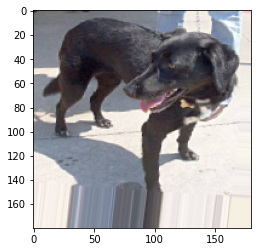

In [30]:
#randomly show data augmentation result
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import array_to_img
img = load_img(img_path, target_size=(180,180))  
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):  
    plt.figure()   
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 1 == 0:
        break  
plt.show()

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # data position 
    target_size=(180,180),  # reshape images
    batch_size=50,
    class_mode="binary"  # loss function binary_crossentropy
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  
    target_size=(180,180),  
    batch_size=50,
    class_mode="binary" 
)

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(1000,activation="relu"),      #Adding the Hidden layer
    
    
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")   #Adding the Output Layer
])

In [26]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["acc"])

In [27]:
history = model.fit(
    train_generator,  
    epochs=100, 
    validation_data=validation_generator,
     
)

Epoch 1/100
20/20 [==============================] - 14s 679ms/step - loss: 0.7129 - acc: 0.5140 - val_loss: 0.6992 - val_acc: 0.5000
Epoch 2/100
 7/20 [=========>....................] - ETA: 7s - loss: 0.6953 - acc: 0.5114

KeyboardInterrupt: 

In [28]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

# acc
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(epochs, acc, color='orange', linestyle=':', marker='.', markersize=7, label="Training acc")
plt.plot(epochs, val_acc, color='blue', linestyle=':', marker='.', markersize=7, label="Validation acc")
plt.plot(epochs, loss, label="Training loss",color='orange', linestyle=':', marker='.', markersize=7)
plt.plot(epochs, val_loss,label="Validation loss",color='blue', linestyle=':', marker='.', markersize=7)
plt.title("Training and Validation acc")
plt.legend()
plt.grid(alpha=0.8)

# loss
plt.figure(figsize=(10, 6),dpi=80)
plt.plot(epochs, loss, label="Training loss",color='orange', linestyle=':', marker='.', markersize=7)
plt.plot(epochs, val_loss,label="Validation loss",color='blue', linestyle=':', marker='.', markersize=7)
plt.title("Training and Validation loss")
plt.legend()
plt.grid(alpha=0.8)

NameError: name 'history' is not defined

In [29]:
# pre-processing test data
test_generator = test_datagen.flow_from_directory(
test_dir,  
target_size=(180,180),  
batch_size=20,
class_mode="binary")

Found 400 images belonging to 2 classes.


In [ ]:
#evaluate model on test data
model.evaluate(test_generator)